# Difference & Difference Analysis
## National Voter Turnout

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load Data
turnout = pd.read_csv('../20_intermediate_files/turnout_v3.csv', index_col=0)

### Difference in Difference Analysis

In [9]:
# Number of states and mean voter turnout in each year-treatment group
( 
    turnout
    .filter(items=['treatment', 'Year', 'VEP_Counted_D'])
    .groupby(['treatment', 'Year'])
    .agg(['count','mean'])
)

VEP_Counted_D          
                       count      mean
treatment Year                        
0         2008            21  0.167962
          2016            21  0.126048
          2020            21  0.147539
1         2008             4  0.072260
          2016             4  0.043136
          2020             4  0.221915

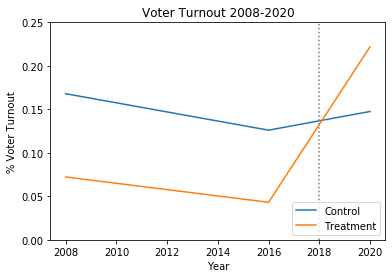

In [13]:
# Voter primary turnout trends from 2008-2020
tbl = ( 
    turnout
    .filter(items=['treatment', 'Year', 'VEP_Counted_D'])
    .groupby(['treatment', 'Year'])
    .agg('mean')
)

plt.plot(tbl.loc[0], label = "Control")
plt.plot(tbl.loc[1], label = "Treatment")
plt.title('Voter Turnout 2008-2020')
plt.legend(loc='lower right')
plt.xlabel('Year')
plt.ylabel('% Voter Turnout')
plt.axvline(x=2018, color='grey', linestyle=':')
plt.ylim(0, .25)
plt.show()

In [11]:
def custom_format(x):
    '''Formats a string as a number and rounds to the 3rd decimal place'''
    return round(float(x),3)

In [12]:
# Casual effect
for group in [0,1]:
    print(f'Voter turnout % delta for group {group}: {custom_format(tbl.loc[group].loc[2020] - tbl.loc[group].loc[2016])}')
    
print(f'\nThe causal effect for primary format elections is {custom_format((tbl.loc[1].loc[2020] - tbl.loc[1].loc[2016]) - (tbl.loc[0].loc[2020] - tbl.loc[0].loc[2016]))}')

Voter turnout % delta for group 0: 0.021
Voter turnout % delta for group 1: 0.179

The causal effect for primary format elections is 0.157
